In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

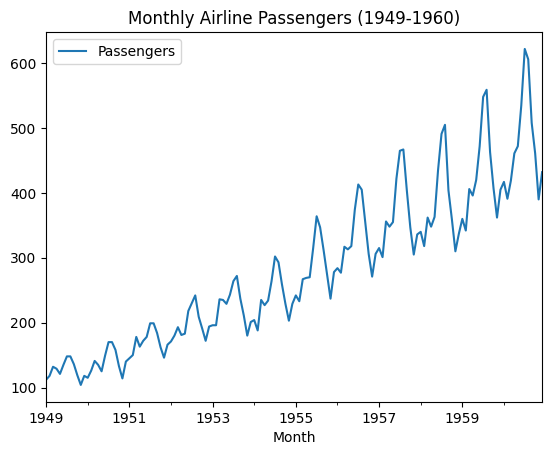

In [5]:
# Load the Airline Passengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df_plot = df.plot(title='Monthly Airline Passengers (1949-1960)')

In [6]:
# Define a function to perform the ADF test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

Original Series
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
-------------
Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
First Differencing
-------------
Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critic

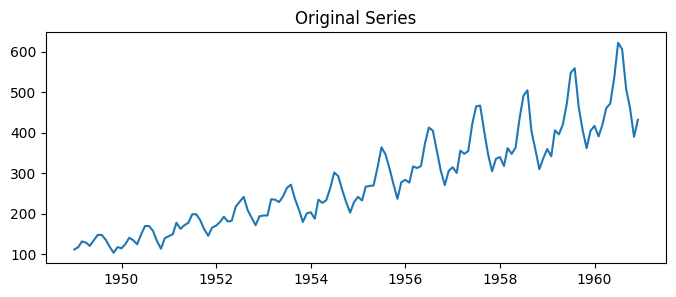

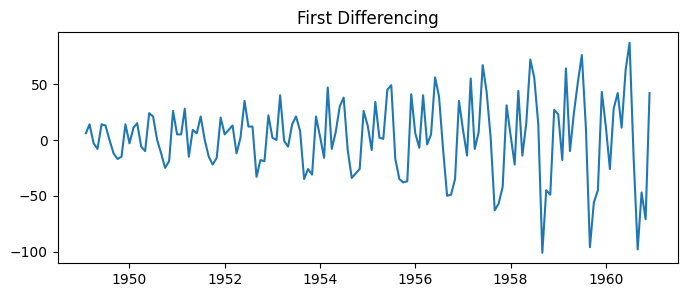

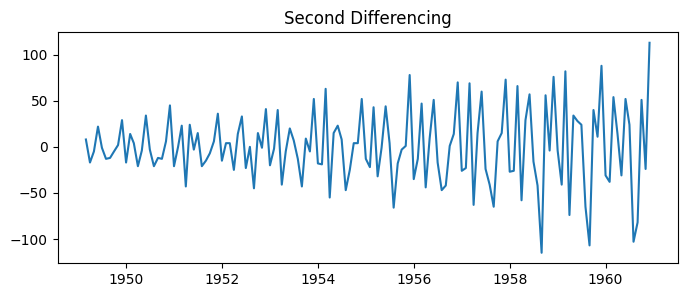

In [10]:
# Original Serie
plt.figure(figsize=(8, 3))
plt.plot(df)
plt.title('Original Series')
print("Original Series")
adf_test(df)
print("-------------")
plt.figure(figsize=(8, 3))
df_diff = df.diff().dropna()
plt.plot(df_diff)
plt.title('First Differencing')
adf_test(df_diff)
print("First Differencing")
print("-------------")
plt.figure(figsize=(8, 3))
df_diff_2 = df_diff.diff().dropna()
plt.plot(df_diff_2)
plt.title('Second Differencing')
adf_test(df_diff_2)
print("Second Differencing")

In [ ]:
# Fit ARIMA model
model = ARIMA(df, order=(24,1,24))
model_fit = model.fit()

In [32]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:               ARIMA(24, 1, 24)   Log Likelihood                -539.022
Date:                Tue, 31 Oct 2023   AIC                           1176.044
Time:                        02:28:26   BIC                           1321.224
Sample:                    01-01-1949   HQIC                          1235.038
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3758      0.301     -1.248      0.212      -0.966       0.214
ar.L2         -0.0874      0.262     -0.333      0.739      -0.601       0.426
ar.L3         -0.0445      0.247     -0.180      0.8

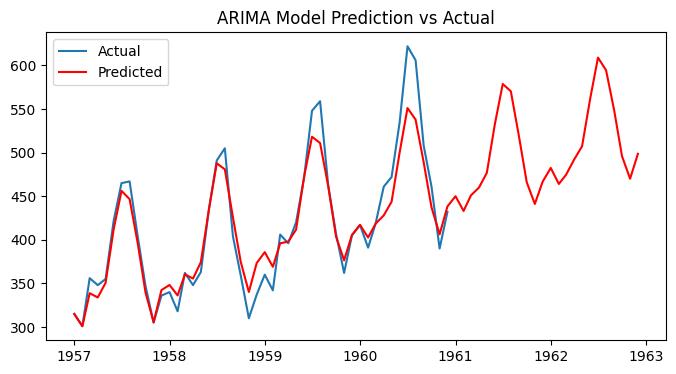

In [34]:
# Predict using the AR model
start_date = '1957-01-01'
end_date = '1962-12-01'
predicted_values = model_fit.predict(start=start_date, end=end_date, dynamic=True)
plt.figure(figsize=(8, 4))
plt.plot(df[start_date:end_date], label="Actual")
plt.plot(predicted_values, label="Predicted", color='red')
plt.legend()
plt.title('ARIMA Model Prediction vs Actual')
plt.show()